In [1]:
import pandas as pd
english = pd.read_csv("../../data/poptrag_lyrics_genres_corpus_filtered_english_lemmatized.csv")

# Baseline

In [2]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

experiment_fs = LyricsClassificationExperiment(
    corpus=english,
    genrecol="cat12",
    lyricscol="full_lyrics",
    artistcol="track.s.firstartist.name",
    random_state=42,
    subsample_debug=0.005, 
    output_dir="data/experiment_outputs/FS_Extractor_Test",
)
experiment_fs.compute_fs_ngram_features()

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


Artist split validated: 388 train, 97 test (disjoint)
No checkpoint found for hash 7de6bbc4..., computing vocabulary...
Extracting n-grams for all orders...
Extracted unigrams:
  - Unique: 6,022
  - Shape: (448, 6022)
  - Examples: ['tense', 'cinnamon', 'anymore', 'gospel', 'foes']
Extracted bigrams:
  - Unique: 31,519
  - Shape: (448, 31519)
  - Examples: ['rode impalas', 'blood on', 'addict just', 'tell your', 'free through']


N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Extracted trigrams:
  - Unique: 48,978
  - Shape: (448, 48978)
  - Examples: ['town well i', 'carry you but', 'all among the', 'your hand your', 'i was ready']
Calculating genre-level TF-IDF for n-grams...
Calculated TF-IDF for 12,332 genre-ngram pairs
Calculated TF-IDF for 40,314 genre-ngram pairs
Calculated TF-IDF for 51,336 genre-ngram pairs
Counting unique artists per n-gram...
Counted unique artists for 6,022 n-grams
Counted unique artists for 31,519 n-grams
Counted unique artists for 48,978 n-grams
Filtering n-grams by minimum artist threshold and ranking by TF-IDF...
Selecting top n-grams per genre and final vocabulary...
Total unique n-grams (FS): 389
Final vocabulary size: 389 n-grams
Fitting CountVectorizer with selected vocabulary...
Saved checkpoint: 7de6bbc4...
FSExtractor configured: FS N-grams (pipeline, top 100/genre, min 20 artists, with unigrams, stopwords filtered)


In [3]:
experiment_fs.train_fixed_parametrer_logistic_regression()
experiment_fs.show_random_baseline_evaluation()
experiment_fs.show_model_evaluation()
experiment_fs.show_top_coefficients_per_genre()
experiment_fs.save_experiment()

Training pipeline with fixed parameters...
F1 macro: 0.099
Precision macro: 0.097
Recall macro: 0.104
Cohen's kappa: 0.038
Selected model parameters:
  C: 1.0
  l1_ratio: 0.5
F1 macro: 0.096
Precision macro: 0.102
Recall macro: 0.100
Cohen's kappa: 0.024
                  precision    recall  f1-score   support

alternative rock       0.00      0.00      0.00         4
      electronic       0.11      0.10      0.11        10
       hard rock       0.00      0.00      0.00         3
     heavy metal       0.00      0.00      0.00         6
         hip hop       0.17      0.12      0.14         8
      indie rock       0.00      0.00      0.00         4
            jazz       0.00      0.00      0.00         2
           metal       0.25      0.08      0.12        12
             pop       0.27      0.33      0.30        24
        pop rock       0.00      0.00      0.00         1
            rock       0.33      0.46      0.38        37

        accuracy                           0.25

N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

# RQ1

In [11]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

experiment_monroe = LyricsClassificationExperiment(
    corpus=english,
    genrecol="cat12",
    lyricscol="lyrics_lemmatized",
    artistcol="track.s.firstartist.name",
    random_state=42,
    subsample_debug=0.02,
    output_dir="data/experiment_outputs/Monroe_Extractor_Test",
)
experiment_monroe.compute_monroe_ngram_features(
    use_stopword_filter=True,
    use_bigram_boundary_filter=True,
    include_unigrams=True,
    prior_concentration=1.0,
    p_value=0.001,
)

Artist split validated: 1097 train, 275 test (disjoint)
No checkpoint found, computing z-scores from scratch...
Extracting n-grams for all orders...
Extracted unigrams:
  - Unique: 10,702
  - Shape: (1803, 10702)
  - Examples: ['yang', 'comma', 'anxiety', 'hurry', 'groom']
Extracted bigrams:
  - Unique: 87,909
  - Shape: (1803, 87909)
  - Examples: ["woman's logic", 'city come', 'all sphere', 'if all', 'heavy ego']
Extracted trigrams:
  - Unique: 175,872
  - Shape: (1803, 175872)
  - Examples: ['yeah yeah what', 'change on the', 'all it strategy', 'in your pocket', 'i be raise']
Extracted quadgrams:
  - Unique: 209,523
  - Shape: (1803, 209523)
  - Examples: ['there s no one', 'bury it and rise', "ain't into hittin pussy", "with big train it's", 'honest just be honest']
Counting unique artists per n-gram...
Counted unique artists for 10,702 n-grams
Counted unique artists for 87,909 n-grams
Counted unique artists for 175,872 n-grams
Counted unique artists for 209,523 n-grams
Filtering n

In [5]:
experiment_monroe.extractor.z_scores_df_.query("passes_bh and z_score > 0").groupby(
    "genre"
).size()

genre
alternative rock     66
electronic           77
hard rock            54
heavy metal         128
hip hop             215
indie rock           59
jazz                 76
metal               234
pop                  87
pop rock             68
rock                 60
dtype: int64

array([[<Axes: title={'center': 'alternative rock'}>,
        <Axes: title={'center': 'electronic'}>,
        <Axes: title={'center': 'hard rock'}>],
       [<Axes: title={'center': 'heavy metal'}>,
        <Axes: title={'center': 'hip hop'}>,
        <Axes: title={'center': 'indie rock'}>],
       [<Axes: title={'center': 'jazz'}>,
        <Axes: title={'center': 'metal'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'pop rock'}>,
        <Axes: title={'center': 'rock'}>, <Axes: >]], dtype=object)

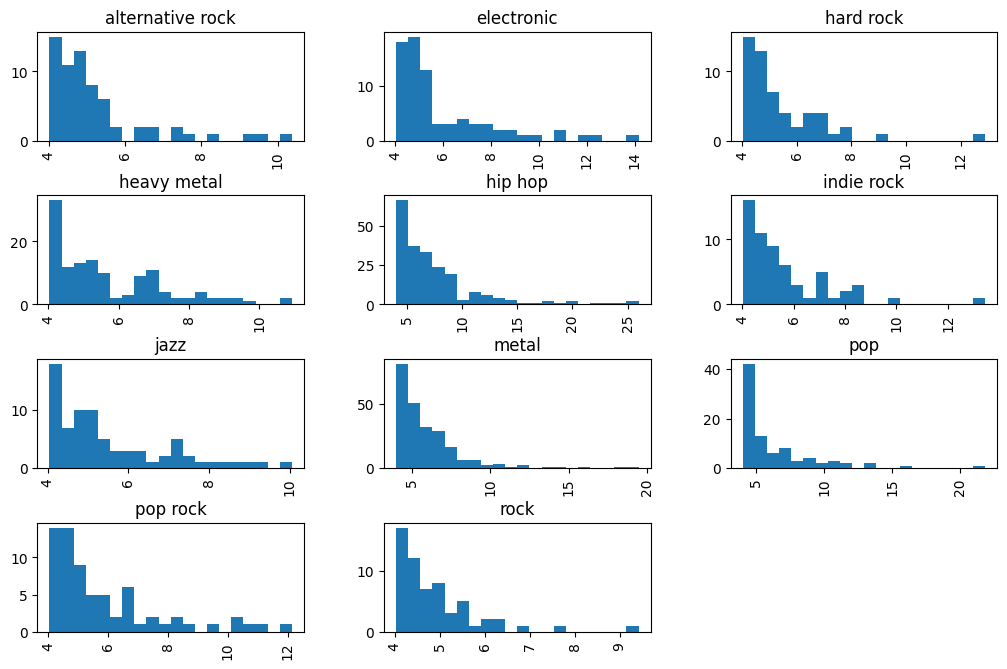

In [6]:
experiment_monroe.extractor.z_scores_df_.query("passes_bh and z_score > 0")[
    "z_score"
].hist(by=experiment_monroe.extractor.z_scores_df_["genre"], bins=20, figsize=(12, 8))

In [7]:
experiment_monroe.train_fixed_parametrer_logistic_regression()
experiment_monroe.show_random_baseline_evaluation()
experiment_monroe.show_model_evaluation()
experiment_monroe.show_top_coefficients_per_genre()
experiment_monroe.save_experiment()

Training pipeline with fixed parameters...
F1 macro: 0.086
Precision macro: 0.087
Recall macro: 0.086
Cohen's kappa: -0.001
Selected model parameters:
  C: 1.0
  l1_ratio: 0.5
F1 macro: 0.204
Precision macro: 0.206
Recall macro: 0.206
Cohen's kappa: 0.151
                  precision    recall  f1-score   support

alternative rock       0.09      0.13      0.11        46
      electronic       0.18      0.24      0.21        90
       hard rock       0.06      0.07      0.07        40
     heavy metal       0.08      0.11      0.09        56
         hip hop       0.60      0.53      0.56        76
      indie rock       0.02      0.03      0.03        31
            jazz       0.08      0.09      0.08        22
           metal       0.39      0.40      0.40       110
             pop       0.33      0.34      0.34       239
        pop rock       0.00      0.00      0.00        16
            rock       0.44      0.32      0.37       412

        accuracy                           0.3

# RQ2

In [8]:
import copy
experiment_stm = copy.deepcopy(experiment_monroe)
experiment_stm.compute_stm_topic_features(k_range=(2, 3))

Aggregating track-level DTM to artist-level...
Artist-level DTM: 1810 artists, 1001 features
Initializing STM topic modeler...
Tuning and fitting STM model...
Converting data to STM format...
Tuning number of topics (K range: (2, 3))...
Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	..
	 Recovering initialization...
 	..........
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -6.034) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.019, relative change = 2.488e-03) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step

In [9]:
experiment_stm.train_fixed_parametrer_logistic_regression()
experiment_stm.show_random_baseline_evaluation()
experiment_stm.show_model_evaluation()
experiment_stm.show_top_coefficients_per_genre()
experiment_stm.save_experiment()

Training pipeline with fixed parameters...
F1 macro: 0.086
Precision macro: 0.087
Recall macro: 0.086
Cohen's kappa: -0.001
Selected model parameters:
  C: 1.0
  l1_ratio: 0.5
F1 macro: 0.027
Precision macro: 0.039
Recall macro: 0.106
Cohen's kappa: 0.008
                  precision    recall  f1-score   support

alternative rock       0.00      0.00      0.00        46
      electronic       0.10      0.12      0.11        90
       hard rock       0.00      0.00      0.00        40
     heavy metal       0.00      0.00      0.00        56
         hip hop       0.30      0.09      0.14        76
      indie rock       0.00      0.00      0.00        31
            jazz       0.02      0.95      0.04        22
           metal       0.00      0.00      0.00       110
             pop       0.00      0.00      0.00       239
        pop rock       0.00      0.00      0.00        16
            rock       0.00      0.00      0.00       412

        accuracy                           0.0

N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
N:\Materialien\Promotion\LyricsGenreRecognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag